In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from src.assignment1.sim import *
from src.my_random.tests import emperical_dist
import matplotlib.pyplot as plt
import seaborn as sns


# Part 1
## Task 1

<AxesSubplot:ylabel='Density'>

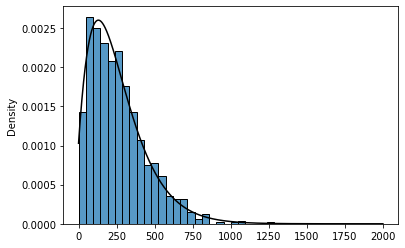

In [2]:
pop = sim_population(1000)
x = np.arange(0,2000)
sns.histplot(pop.ages, stat='density')
sns.lineplot(x=x, y=lifetime_pdf(1, 2000), color='k')

In [3]:
pop.local_reappearence_fraction

0.711

## Task 2

In [4]:
pop.stage_distribution(120), check_distribution_at(pop, 120)

([354, 143, 178, 59, 266],
 Power_divergenceResult(statistic=4.932702193047918, pvalue=0.2942726345230383))

In [5]:
pop.mean_age(.95), lifetime_expectation()

((261.333, array([249.86453185, 272.80146815])), 262.3716153127931)

## Task 3

<AxesSubplot:>

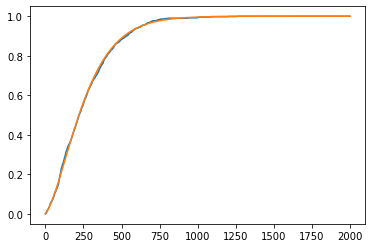

In [26]:
x = np.arange(0,2000+1)
sns.lineplot(x=x, y=[emperical_dist(i, pop.ages) for i in x])
sns.lineplot(x=x, y=lifetime_cdf(x))

In [27]:
stats.kstest(pop.ages, lambda x: lifetime_cdf(x))

KstestResult(statistic=0.02421912545077387, pvalue=0.5918301787165178)

## Task 4

In [4]:
crit_pop = sim_population_with_criteria(1000, 12)
crit_pop.mean_age(.95)

200
200
200
200
200
400
400
400
400
400
400
600
600
600
600
600
600
600
600
600
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
1000


(178.569, array([169.52136486, 187.61663514]))

## Task 5

In [7]:
n = 100
pop_size = 200
U = np.zeros(n)
X = np.zeros(n)

for i in range(n):
    frac_pop = sim_population(pop_size)
    X[i] = frac_pop.women_death_at(time=350)
    U[i] = frac_pop.mean_age(0.95)[0]

Before using control variates the resulting variance is: 37.6331
Which is reduced to the following value when using control variates: 12.99


<AxesSubplot:ylabel='Density'>

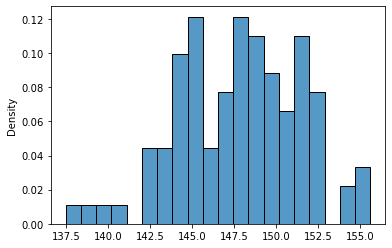

In [8]:
mu = lifetime_expectation()
c = c = -(np.mean(U*X)-np.mean(U)*np.mean(X))/np.var(U)
Z = X + c*(U-mu)
varX = np.var(X)
varZ = np.var(Z)
print(f'Before using control variates the resulting variance is: {varX}\nWhich is reduced to the following value when using control variates: {varZ:.2f}')
sns.histplot(Z,bins=20, stat='density')